<a href="https://colab.research.google.com/github/Nikita-Gupta-19/IBM-HR-Analytics-Employee-Attrition-Performance/blob/main/IBM_HR_Analytics_Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the Dataset**

In [ ]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Data Cleaning and Initial Exploration**

In [ ]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing Values (%):")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check datatypes
print("\nData types:")
print(df.dtypes)

# Basic statistical overview
print("\nStatistical Summary:")
print(df.describe())

Shape of dataset: (1470, 35)

Missing Values (%):
Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear 

# **Feature Engineering**

In [ ]:
# Drop unnecessary columns
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

# Create new feature: TotalSalaryPerYear
df['TotalSalaryPerYear'] = df['MonthlyIncome'] * 12

# Create OvertimeFlag (binary)
df['OvertimeFlag'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Create Age Band
df['AgeBand'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60], labels=['<25', '25-35', '35-45', '45+'])

# Create Distance Category
df['DistanceCategory'] = pd.cut(df['DistanceFromHome'], bins=[0, 5, 10, 20, 100], labels=['0-5km', '6-10km', '11-20km', '>20km'])

# Tenure band
df['TenureBand'] = pd.cut(df['YearsAtCompany'], bins=[-1,2,5,10,40], labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '>10 yrs'])

# Work Satisfaction Score: average of 4 satisfaction metrics
df['SatisfactionScore'] = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']].mean(axis=1)

# Check the changes
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSalaryPerYear,OvertimeFlag,AgeBand,DistanceCategory,TenureBand,SatisfactionScore
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,6,4,0,5,71916,1,35-45,0-5km,5-10 yrs,2.00
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,10,7,1,7,61560,0,45+,6-10km,5-10 yrs,3.00
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,0,0,0,25080,1,35-45,0-5km,<2 yrs,3.00
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,8,7,3,0,34908,1,25-35,0-5km,5-10 yrs,3.25
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,2,2,2,2,41616,0,25-35,0-5km,<2 yrs,2.50


# **Exploratory Data Analysis (EDA)**

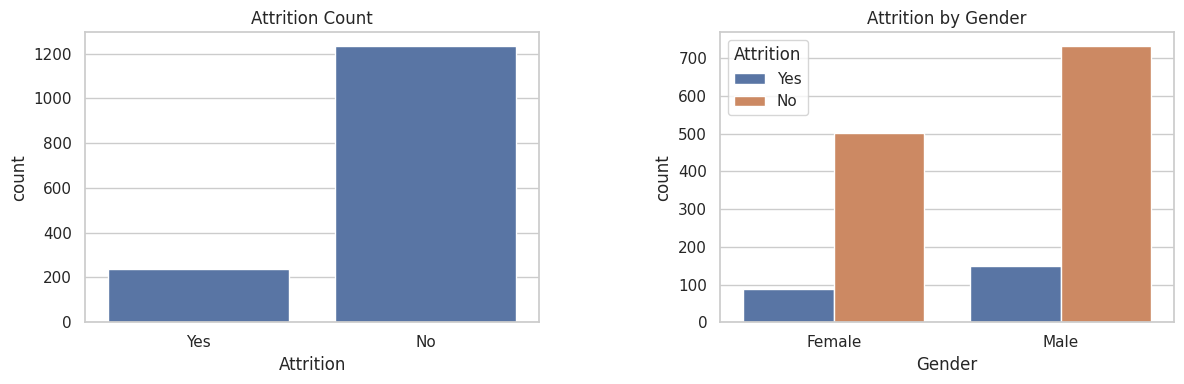

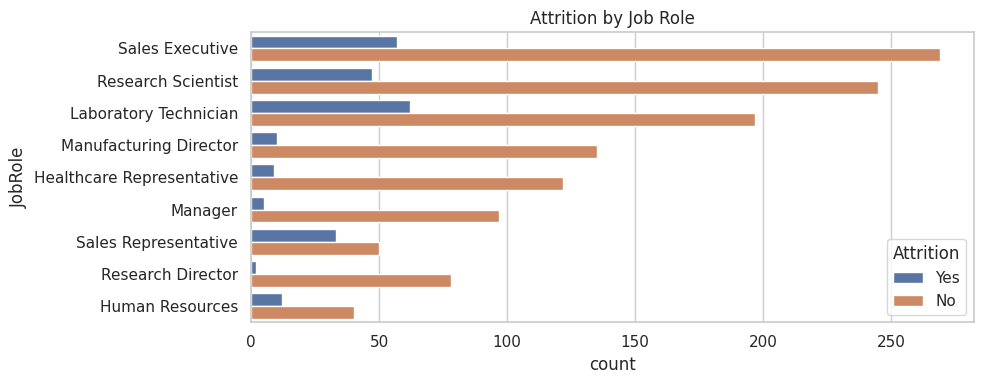

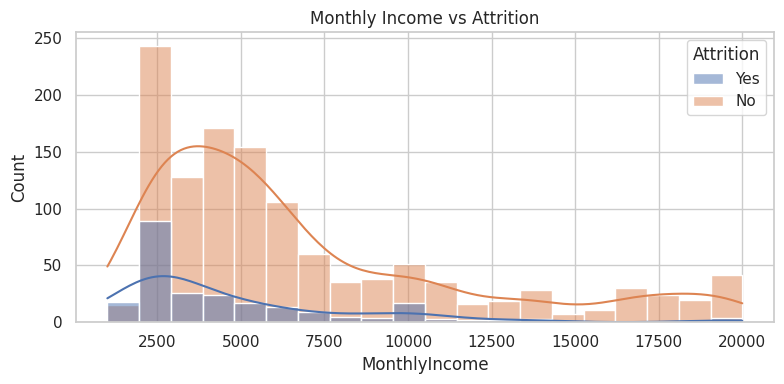

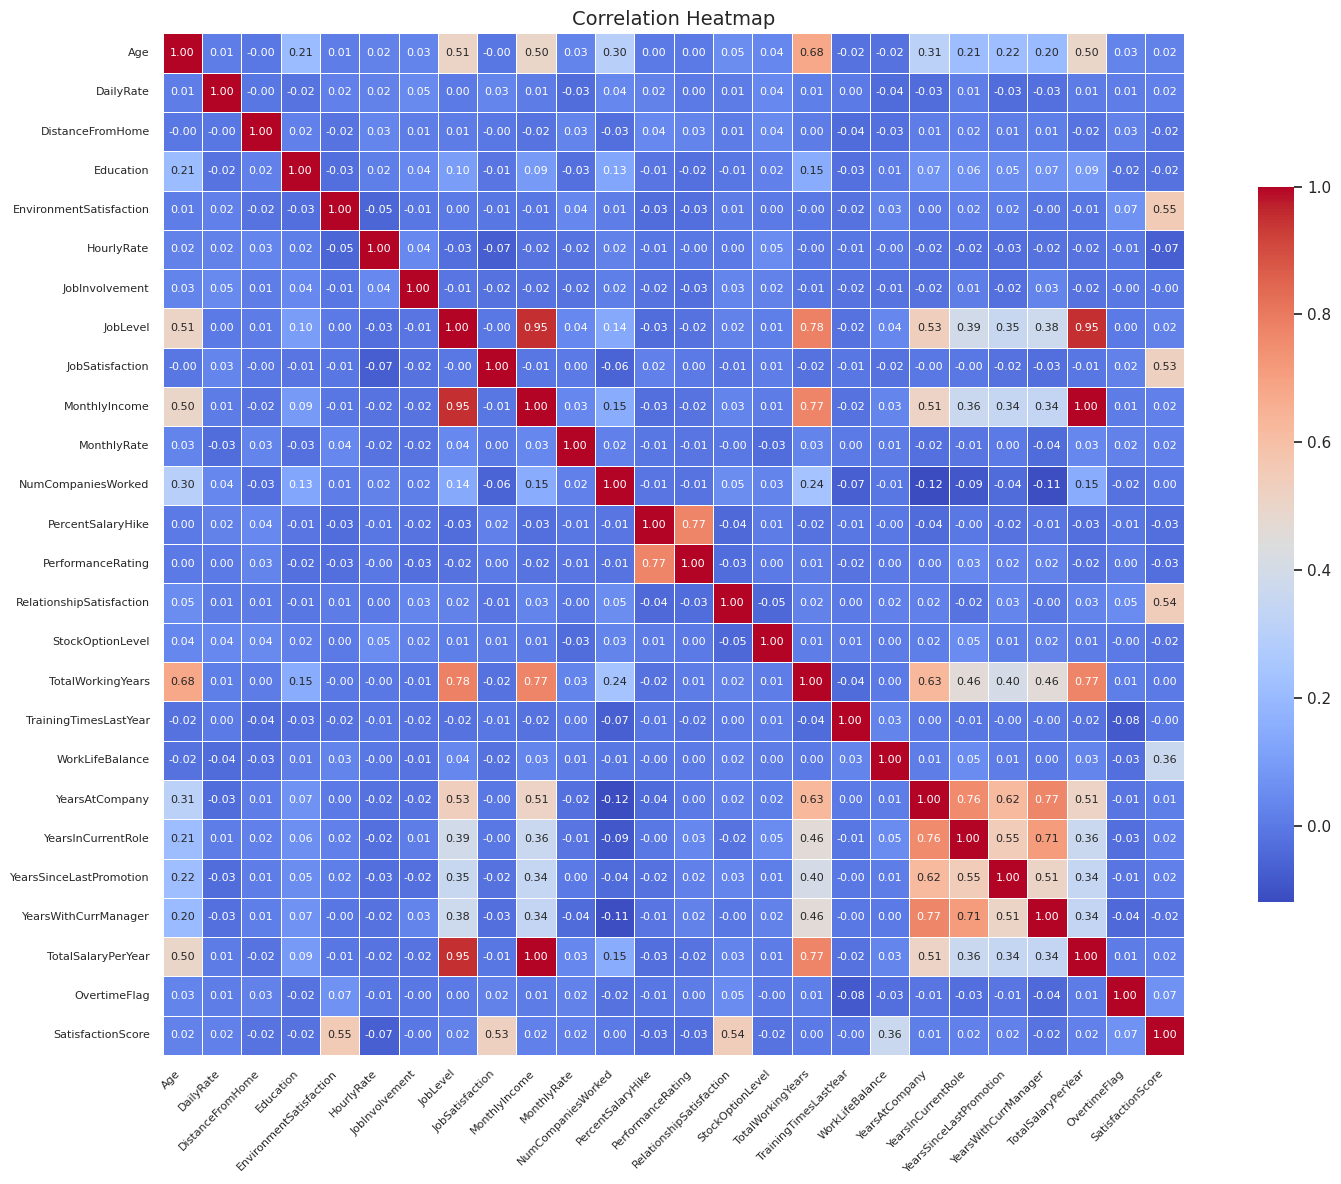

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create figure and axes for the first row of 2 plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x='Attrition', ax=axes[0])
axes[0].set_title("Attrition Count")

sns.countplot(data=df, x='Gender', hue='Attrition', ax=axes[1])
axes[1].set_title("Attrition by Gender")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()
print()

# Row 2: Attrition by JobRole (alone due to width)
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.tight_layout()
plt.show()
print()

# Row 3: MonthlyIncome distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title("Monthly Income vs Attrition")
plt.tight_layout()
plt.show()
print()

# Row 4: Correlation Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8},
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# **Encoding & Preprocessing for ML**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode Attrition as target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Label Encoding for binary columns
binary_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building & Evaluation**

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294




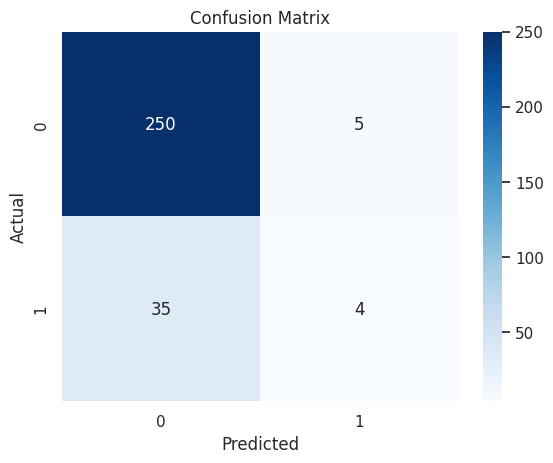

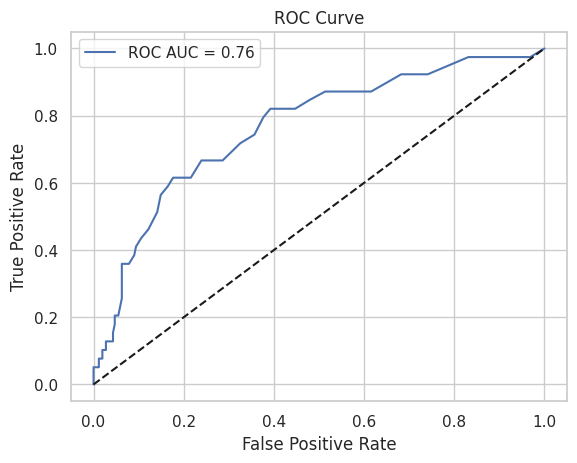

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()

# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **SHAP Explainability**

In [ ]:
# Import SHAP
import shap

# Initialize SHAP Explainer with your trained model
explainer = shap.TreeExplainer(model)

# Compute SHAP values on X_test
shap_values = explainer.shap_values(X_test)

# Check shape to avoid errors
print("SHAP shape:", shap_values[1].shape)
print("X_test shape:", X_test.shape)

SHAP shape: (56, 2)
X_test shape: (294, 56)


**SHAP Summary Plot**

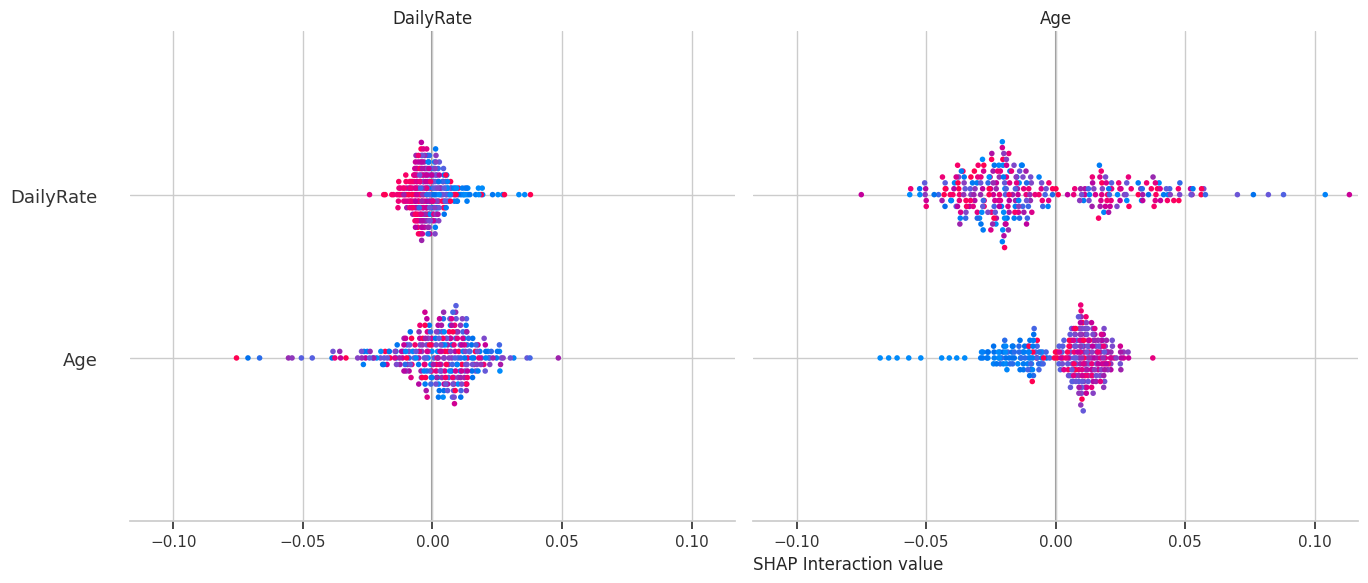

In [ ]:
# Summary plot (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.gcf().set_size_inches(45, 6)
plt.xlabel("SHAP Interaction value", fontsize=12, loc='left')
plt.tight_layout()
plt.show()

**SHAP Waterfall Plot (for one employee)**

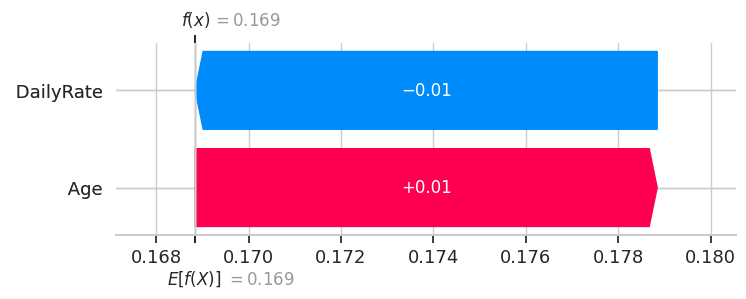

In [ ]:
# Index from the X_test set
employee_index = 10

# Waterfall plot to explain prediction for that employee
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],      # Base value for class "Yes"
    shap_values[1][employee_index],   # SHAP values for that employee
    X_test.iloc[employee_index]       # Feature values for that employee
)

# **Export Cleaned Data to CSV**

In [ ]:
# Export the cleaned, feature-rich dataset

df.to_csv("HR_analytics_data_final.csv", index=False)
from google.colab import files
files.download("HR_analytics_data_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>